In [63]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [97]:
data=pd.read_csv(r'C:\Users\GOKUL BABU K\Downloads\titanic_dataset.csv')

In [98]:
#checking data is imported to Python environment by printing the data.
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [66]:
data=pd.read_csv(r'C:\Users\GOKUL BABU K\Downloads\titanic_dataset.csv', index_col = "PassengerId")

In [99]:
# Checking the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [100]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
# Checking for the null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Insight
- Age, Cabin and embarked columns having missing values

In [102]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [11]:
# Using interpolate function to fill the missing values.
#data['Age'] = data['Age'].interpolate()

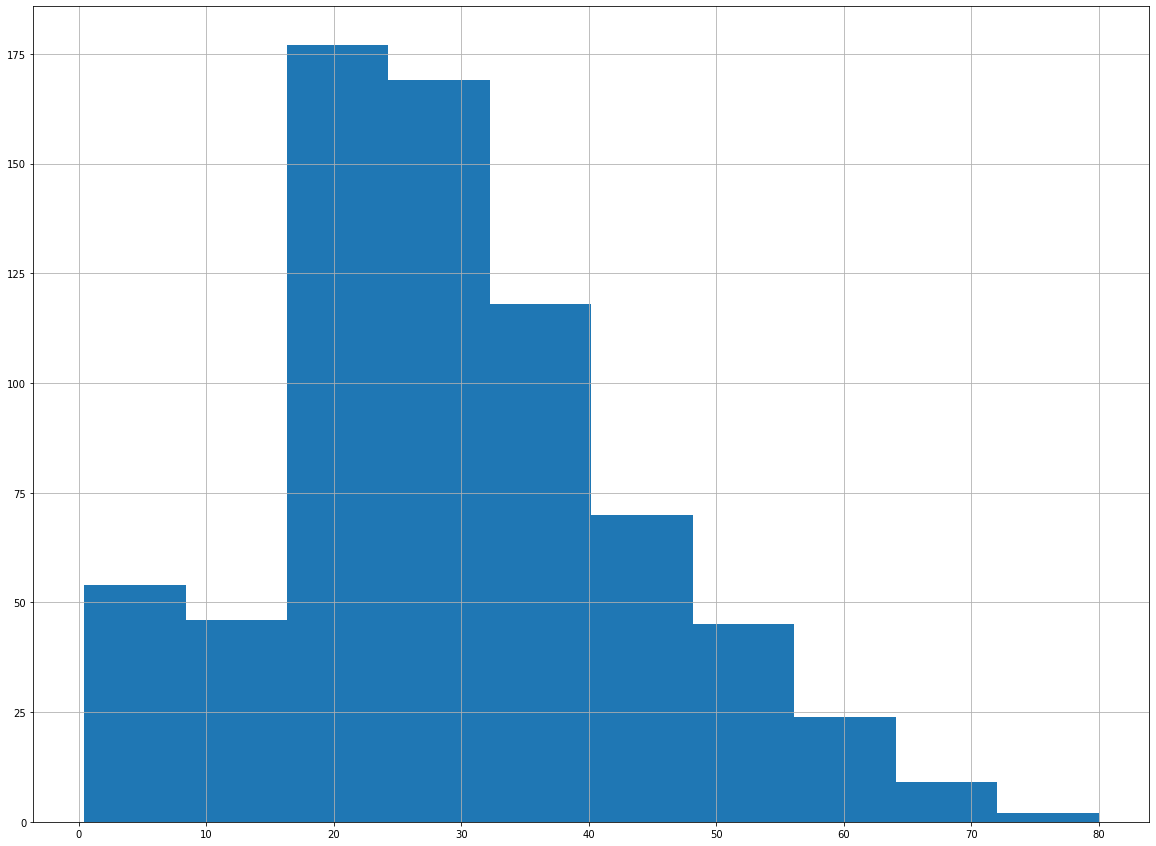

In [103]:
# Plotting "Age" column for finding the kind of distribution
freqgraph=data['Age']
freqgraph.hist(figsize=(20,15))
plt.show()

- As it is following normal distribution we can fill the missing values with mean/median/mode

In [104]:
# Filling missing values with median
data['Age']=data['Age'].replace(np.NaN,data['Age'].median())

In [105]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
# As we have 687 values to fill in "Cabin" column we are just filling it with "Unknown"
data['Cabin']=data['Cabin'].replace(np.NaN,"Unknown")

In [107]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [108]:
# As the "Embarked" column having only two missing values we can fill it with the mode
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [109]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [110]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 5. Check and handle outliers in at least 3 columns in the dataset

# 1. Fare Column

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

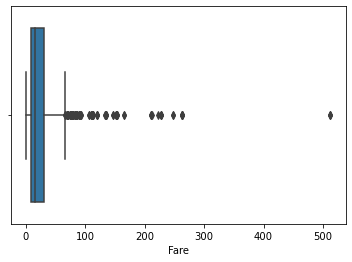

In [112]:
# Visualization of "Fare" column with box plot
sns.boxplot(data['Fare'],data=data)

In [114]:
# Finding inter quartile rage to identify the upper and lower limit to omit the outliers
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1

In [115]:
IQR

23.0896

In [116]:
#Upper and lower limits are finding to remove the outliers
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
print("Lower limit is",lower_limit)
print("Upper limit is",upper_limit)

Lower limit is -26.724
Upper limit is 65.6344


In [117]:
# Finding the index of the values which are outside the limit
index=data['Fare'][(data['Fare']>upper_limit)].index
data.drop(index,inplace=True)

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

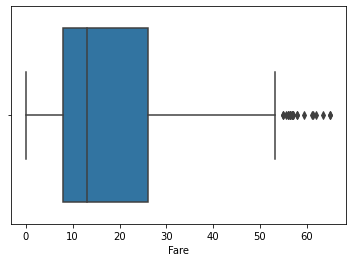

In [118]:
sns.boxplot(data['Fare'])

# 2. Age column

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

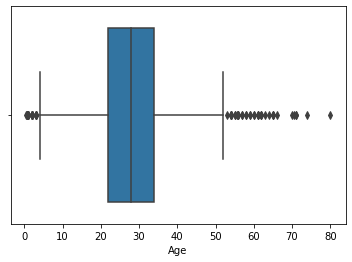

In [120]:
# Visualization of "Age" column with box plot
sns.boxplot(data['Age'])

In [121]:
# Finding inter quartile rage to identify the upper and lower limit to omit the outliers
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1

In [122]:
IQR

12.0

In [123]:
#Upper and lower limits are finding to remove the outliers
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
print("Lower limit is",lower_limit)
print("Upper limit is",upper_limit)

Lower limit is 4.0
Upper limit is 52.0


In [125]:
# Finding the index of the values which are outside the limit
index=data['Age'][(data['Age']>upper_limit)|(data['Age']<lower_limit)].index
data.drop(index,inplace=True)

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

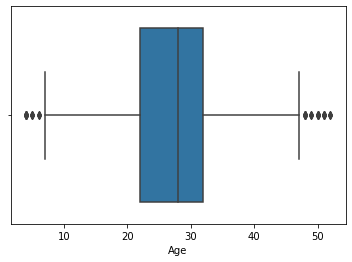

In [126]:
sns.boxplot(data['Age'])

# 3. SibSp

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

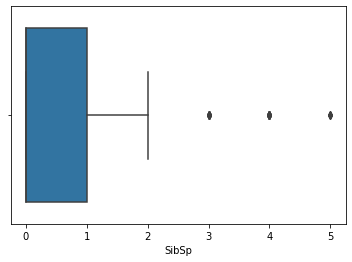

In [129]:
sns.boxplot(data['SibSp'])

In [130]:
# Finding inter quartile rage to identify the upper and lower limit to omit the outliers
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1

In [131]:
IQR

1.0

In [132]:
#Upper and lower limits are finding to remove the outliers
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
print("Lower limit is",lower_limit)
print("Upper limit is",upper_limit)

Lower limit is -1.5
Upper limit is 2.5


In [133]:
# Finding the index of the values which are outside the limit
index=data['SibSp'][(data['SibSp']>upper_limit)|(data['SibSp']<lower_limit)].index
data.drop(index,inplace=True)

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

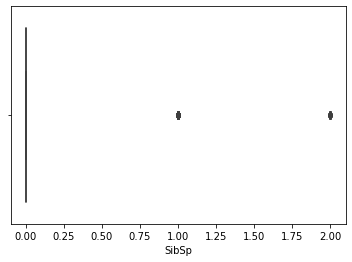

In [134]:
sns.boxplot(data['SibSp'])

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

- Not understood properly..